Perform data inspection and identify any missing or inconsistent values.

In [23]:
import pandas as pd

#load dataset
file_path = '/content/cheg472 final dataset.xlsx'

#read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path, header=1, nrows = 102)

# Check for missing values in the dataset and print the total number of missing values for each column
missing_data = df.isnull().sum()

# Print the result
print("Total number of missing values for each column:")
print(missing_data)

#drop noninput data
df = df.drop('Material', axis=1)

#drop columns with too much missing data
df = df.drop('Doping Agent', axis=1)
df = df.drop('pre carbonization (°C)', axis=1)
df = df.drop('Time (h)', axis=1)
df = df.drop('Purifying', axis=1)
df_cleaned = df

# Check for missing values in the dataset and print the total number of missing values for each column
missing_data = df_cleaned.isnull().sum()

# Print the result
print("Total number of missing values for each column:")
print(missing_data)

#show first few rows
print(df_cleaned.head())

Total number of missing values for each column:
Material                         0
Doping Agent                    76
Activation Agent                 0
Ratio of activation Agent        0
pre carbonization (°C)          33
Time (h)                        30
Carbonization (°C)               0
Time (h).1                       0
ACR (%)                          0
CMR (%)                          0
BR (%)                           0
KB                               0
CM/AC                            0
B/AC                             0
CM/B                             0
V0.1 (cm^3/g)                    0
V0.4 (cm^3/g)                    0
V0.9 (Cm^3/g)                    0
Purifying                       16
Molarity of HCl (M)              0
Electrode system (2E/3E)         0
Molarity of Electrolyte (M)      0
Electrolyte Kind                 0
Potential Window (V)             0
Specific Capacitance-SC(F/g)     0
 Rate Cpability (F/g)            0
dtype: int64
Total number of missing value

encode categorical variables

In [24]:
#identify catergorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

#display categorical columns
categorical_columns

#apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df_cleaned,columns=categorical_columns,drop_first=True)

#display the first few rows of the encoded dataset
df_encoded.head()

,Ratio of activation Agent,Carbonization (°C),Time (h).1,ACR (%),CMR (%),BR (%),CM/AC,B/AC,CM/B,V0.1 (cm^3/g),...,Activation Agent_KOH,Activation Agent_ZnCl2,Activation Agent_none,KB_PVDF,KB_none,Electrode system (2E/3E)_3E,Electrolyte Kind_H2SO4,Electrolyte Kind_KOH,Electrolyte Kind_NaNO3,Electrolyte Kind_TEABF4/PC
0,1.0,700,2.0,75.0,20.0,5.0,0.266667,0.066667,4.0,0.032258,...,True,False,False,False,False,True,False,True,False,False
1,1.2,700,1.0,80.0,15.0,5.0,0.187500,0.062500,3.0,0.005479,...,True,False,False,True,False,True,False,True,False,False
2,4.0,800,1.0,80.0,10.0,10.0,0.125000,0.125000,1.0,0.010267,...,True,False,False,False,False,True,False,True,False,False
3,2.0,800,2.5,83.3,16.7,0.0,0.200480,0.000000,16.0,0.015154,...,True,False,False,False,True,True,False,True,False,False
4,3.0,650,2.0,80.0,10.0,10.0,0.125000,0.125000,1.0,0.050125,...,True,False,False,True,False,False,True,False,False,False


Generate summary statistics (mean, median, standard deviation, etc.) for the dataset.

In [25]:
# Calculate statistics for numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number')

# Mean
mean_values = numeric_cols.mean()

# Median
median_values = numeric_cols.median()

# Standard Deviation
std_values = numeric_cols.std()

# Min and Max
min_values = numeric_cols.min()
max_values = numeric_cols.max()

# Interquartile Range (IQR)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
iqr_values = Q3 - Q1

# Display the results
stats_summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values,
    'Min': min_values,
    'Max': max_values,
    'Interquartile Range (IQR)': iqr_values
})

print(stats_summary)

                                    Mean      Median  Standard Deviation  \
Ratio of activation Agent       2.518317    2.000000            1.843580   
Carbonization (°C)            780.554455  800.000000          136.278573   
Time (h).1                      1.789109    2.000000            1.002387   
ACR (%)                        81.155446   80.000000            3.768301   
CMR (%)                        10.295050   10.000000            3.526085   
BR (%)                          8.446535   10.000000            2.799091   
CM/AC                           0.128259    0.125000            0.045858   
B/AC                            0.104985    0.125000            0.036722   
CM/B                            1.529656    1.000000            1.686181   
V0.1 (cm^3/g)                   0.033439    0.027569            0.028399   
V0.4 (cm^3/g)                 600.459281  581.661891          310.173459   
V0.9 (Cm^3/g)                 736.713608  734.217507          374.127984   
Molarity of 

create heatmap for numerical variables

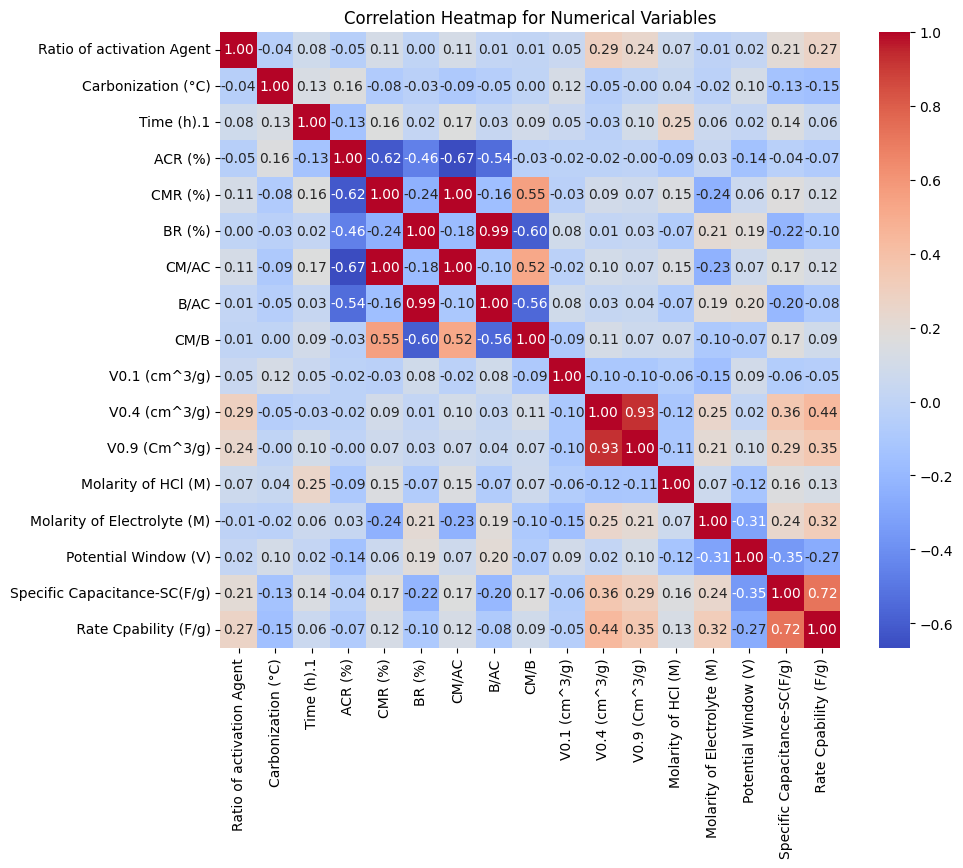

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

machine learning algorithm

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import math
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# Separate features (all columns except the last 2) and targets (last 2 columns)
features = df.iloc[:, :-2]  # All columns except the last 2
targets = df.iloc[:, -2:]   # The last 2 columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

# Combine training and testing data for consistent encoding
combined_data = pd.concat([X_train, X_test])

# Encode non-numeric columns
for col in non_numeric_cols:
    le = LabelEncoder()
    le.fit(combined_data[col])  # Fit on combined data for consistent encoding
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Standardizing the data (for certain models like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Models (Regression)
# Wrap SVR in MultiOutputRegressor for multi-output regression
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVM": MultiOutputRegressor(SVR())
}

# Training and evaluating the models
best_model = None
best_rmse = float('inf')

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use scaled data for SVM, for others, use non-scaled data
    if model_name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)

    # Calculate RMSE for the test dataset
    rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))

    # Save the best model based on RMSE for the test dataset
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_model = model
        best_model_name = model_name

    print(f"{model_name} RMSE on Test Data: {rmse_test:.4f}")

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the feature columns after preprocessing
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

print(f"Best model: {best_model_name} with RMSE: {best_rmse:.4f}")

Training Random Forest...
Random Forest RMSE on Test Data: 68.3969
Training Linear Regression...
Linear Regression RMSE on Test Data: 64.0539
Training Decision Tree...
Decision Tree RMSE on Test Data: 89.7939
Training SVM...
SVM RMSE on Test Data: 80.6386
Best model: Linear Regression with RMSE: 64.0539


code for ML app

In [ ]:
import subprocess
import sys
import streamlit as st
import pandas as pd
import pickle

# Force install scikit-learn if not found
try:
    import sklearn
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    import sklearn  # Import again after installation


# Load the pre-trained model
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the feature columns used during training
with open('feature_columns.pkl', 'rb') as f:
    required_columns = pickle.load(f)

# Title of the app
st.title("CHEG 472 Final")

# Sidebar inputs for user preferences (input choices based off of heatmap)
st.sidebar.header("Inputs")

aa = st.sidebar.selectbox("Activation Agent",['KOH', 'H2SO4', 'ZnCl2', 'KCl', 'CaCl2', 'H3PO4', 'none'])
aaratio = st.sidebar.slider("Temperature", 0.0, 12.0, 0.0 , 0.25)
ctemp = st.sidebar.slider("Carbonation Temp (C)", 110, 1100, 110 , 1)
ctime = st.sidebar.slider("Carbonation Time (hr)", 0.1, 5.0, 0.1, 0.1)
ACR = st.sidebar.slider("ACR %", 71.4, 95.0, 71.4, 0.1)
CMR = st.sidebar.slider("CMR %", 0.0, 20.0, 0.0, 0.1)
BR = st.sidebar.slider("BR %", 0.0, 15.0, 0.0, 0.1)
KB = st.sidebar.selectbox("KB",['PTFE', 'PVDF', 'none'])
CMAC = st.sidebar.slider("CM/AC", 0.0, 14.15, 0.0, 0.01)
BAC = st.sidebar.slider("B/AC", 0.0, 0.2, 0.0, 0.01)
CMB = st.sidebar.slider("CM/B", 0.0, 16.0, 0.0, 0.01)
V04 = st.sidebar.slider("V04", 0.786, 1257.522, 0.786, 0.001)
V09 = st.sidebar.slider("V09", 0.843, 1904.762, 0.843, 0.001)
electrode = st.sidebar.selectbox("Electrode System",['2E', '3E'])
molarity = st.sidebar.slider("Molarity of Electrolyte", 1.0, 6.0, 1.0, 0.5)
electrolyte = st.sidebar.selectbox("Electrolyte",['KOH','H2SO4','TEABF4/PC','NaNO3'])
pontential = st.sidebar.slider("Potential Window (V)", 0.8, 3.0, 0.8, 0.1)


# Add a submit button
if st.button("Submit"):
    # Create input DataFrame
    input_data = pd.DataFrame({
        'Activation Agent': [aa],
        'Ratio of activation Agent': [aaratio],
        'Carbonization (°C)': [ctemp],
        'Time (h)': [ctime],
        'ACR (%)': [ACR],
        'CMR (%)': [CMR],
        'BR (%)': [BR],
        'KB': [KB],
        'CM/AC': [CMAC],
        'B/AC': [BAC],
        'CM/B': [CMB],
        'V0.4 (cm^3/g)': [V04],
        'V0.9 (Cm^3/g)': [V09],
        'Electrode system (2E/3E)': [electrode],
        'Molarity of Electrolyte (M)': [molarity],
        'Electrolyte Kind': [electrolyte],
        'Potential Window (V)': [pontential]
    })

    # One-hot encode the input data
    input_encoded = pd.get_dummies(input_data)

    # Align input_encoded with the required columns from training
    for col in required_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[required_columns]

    # Make the prediction
    prediction1 = model.predict(input_encoded)[0]
    prediction2 = model.predict(input_encoded)[1]

    # Display the prediction
    st.subheader(f"Specific Capacitance-SC(F/g): {prediction1}")
    st.subheader(f" Rate Cpability (F/g): {prediction2}")